# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [83]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve

In [84]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [85]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [86]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


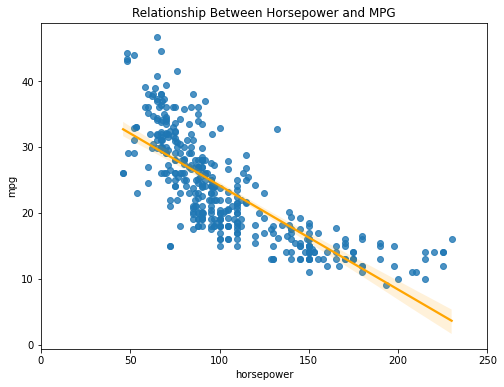

In [87]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us? RSS = SSE

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [88]:
# call_on_students(1)

#### Answer: 

- Graph of cost function, which is:
    - Graph of sum of (Model mpg - mpg data points) squared at different levels of the parameter (hoursepower). 
    - RSS = SSE = residual sum of squares = sum of squared estimate of errors
- Errors are minimized at a slope of about -0.157
- Gradient is another term for derivative, the rate of change, the slope of the tangent of the line

- This is the cost function for linear regression
- **Logistic regression's cost function = log loss = binary cross entropy. It transforms the non-convex logistic regression cost fucntion so that we only have one global minimum, so we don't get stuck at local minima**


### 2) Imagine that you're starting at a slope towards the top upper left corner. Describe how gradient descent would work.

In [89]:
# call_on_students(1)

#### Answer: 
Obviously we would need an infinite number of examples of the parameter to get the full cost/loss function, so instead we choose one "guess" (a set of parameters) and calculate the cost/loss function there. 
- At that point we calculate the loss/cost function (sum of residuals squared)
- Then we take the gradient (or slope/derivative) of the cost function at that point
    - The gradient tells us how the function is changing in each dimension. The variable with the largest value of the derivative will have the largest/steepest increase in its direction which = the largest/steepest increase in error. 
    - This is one parameter, so one dimension! Still just going in opposite direction of gradient
- So we just have to go in the opposite direction, minimizing that parameter
- Continue doing that until we get the derivative to as close to 0 as possible, which leads us to the optimal parameters.
    - OR continue until we reach a **stopping criteria** that we set
- A steeper gradient = larger derivative of the cost function = further away from the minimum

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [90]:
# call_on_students(1)

#### Answer: 

- Step size = alpha = learning rate = a hypterparameter that sets how big a step we take "down the hill" of the cost function = how much we adjust our parameter
- if it's too big, you risk skipping over the minimum, if it's too small the iterations will take forever
- Solution: make the step size/alpha proportional to the size of the derivative at that point. If the derivative is large, you're further away from the minimum (where slope approaches 0) so you can take a larger step. And vice versa
    - The parts of the gradient that are steeper = the larger the steps will be
- The constant of proportionality between the step size and the derivative is the *learning rate*
    - The optimal learning rate will have the steepest drop in loss


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [91]:
# call_on_students(1)

#### Answer: 

- Logistic Regression is a transformation of a linear regression meant to solve a Classification Problem - which comes about because we have a *categorical target* instead of a continuous one
    - linear REGRESSION vs. logistic CLASSIFICATION (but is still linear)
- Transformation done via **expit and logit**
- Predictions result from .predict. They are an array of 0 or 1 for whether that target will be a 0 or 1. They round up from a threshold (default 0.5) probability of achieving a binary outcome of 1. So if the probability is 0.6 it will predict that that y is class 1
    - .predict_proba() would give you probabilities (an array of decimals) instead of 0's and 1's
- Parametric b/c it provides regression coefficients for each predictor
    - although harder to directly interpret coefficients


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [92]:
# call_on_students(1)

#### Answer: 
vs. Decision Trees
- Benefit of log reg: less sensitive to noisy data, i.e. less prone to overfitting
    - Less sensitive to class imbalances
- Benefit of decision tree: not sensitive to outliers since it's not distance based
    - Logreg is regularized = distance based = needs scaling.

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [93]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [94]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [95]:
# call_on_students(1)

In [96]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop('target', axis=1)
y = mpg_class.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.33)

In [97]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [98]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [99]:
# Code to explore
# checking if there's a class imbalance
import numpy as np
np.bincount(y_train)

array([195,  67])

#### Answer:

- The target has a class imbalance, where most of the data is in the 0 class


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Baseline could predict 0 at all times


#### Part 3: How accurate would that baseline be on test data?


In [100]:
# Code to find the answer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_scaled, y_train)
cv_dummy = cross_val_score(dummy, X_train_scaled, y_train)
cv_dummy.mean()

0.7443396226415094

In [101]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- Since it just predicts the most common class (0), its accuracy will just be equal to the proportion of 0's in the target


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [102]:
# call_on_students(1)

#### Answer:

- Obviously you have a ton of false negatives with the dummy we chose- 26% of the time you predict class 0 is actually incorrect.
- The problem is the class imbalance:
    - Do a logistic regression but set the threshold manually. If you lower the threshold for class 1, more data points will be classified as such.
    - Oversampling (SMOTE) the minority
    - Undersampling the majority --> losing data
    - Change evaluation metric
    - Change the **class_weight hyperparameter. Set it to 'balanced' --> takes the proportions in the y data and weights the minority class higher until it matches the majority**
- Something about a cost matrix?

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our train and test set

In [103]:
# call_on_students(1)

In [104]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [105]:
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

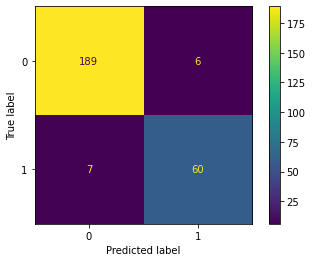

In [106]:
# Plot a confusion matrix on the train data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred)).plot() 


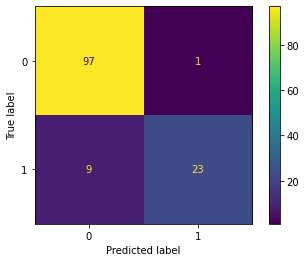

In [107]:
# Plot a confusion matrix on the test data
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot() 


### 10) Calculate the accuracy, precision, recall and f1-score for the train and test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [108]:
# Accuracy
print("Train Accuracy", accuracy_score(y_train, y_train_pred))
print("Test Accuracy", accuracy_score(y_test, y_test_pred))

Train Accuracy 0.950381679389313
Test Accuracy 0.9230769230769231


In [109]:
# Precision
print("Train Precision", precision_score(y_train, y_train_pred))
print("Test Precision", precision_score(y_test, y_test_pred))

Train Precision 0.9090909090909091
Test Precision 0.9583333333333334


In [110]:
# Recall
print("Train Recall", recall_score(y_train, y_train_pred))
print("Test Recall", recall_score(y_test, y_test_pred))

Train Recall 0.8955223880597015
Test Recall 0.71875


In [111]:
# F1-Score
print("Train F1", f1_score(y_train, y_train_pred))
print("Test F1", f1_score(y_test, y_test_pred))

Train F1 0.9022556390977443
Test F1 0.8214285714285714


### 11) Calculate the ROC-AUC on the train and test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [112]:
# call_on_students(1)

In [113]:
# Calculate roc-auc
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

y_hat_train = logreg.predict_proba(X_train_scaled)[:, 1]
print("Train ROC-AUC", roc_auc_score(y_train, y_hat_train))

y_hat_test = logreg.predict_proba(X_test_scaled)[:, 1]
print("Test ROC-AUC", roc_auc_score(y_test, y_hat_test))


Train ROC-AUC 0.9897435897435898
Test ROC-AUC 0.9811862244897959


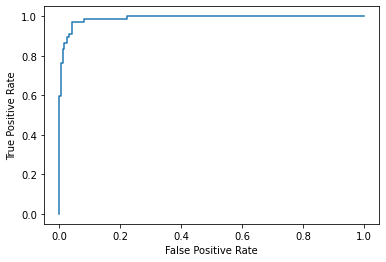

In [114]:
# Plot the ROC curve
fpr_train, tpr_train, thresholds = roc_curve(y_train, y_hat_train)
RocCurveDisplay(fpr=fpr_train, tpr=tpr_train).plot()

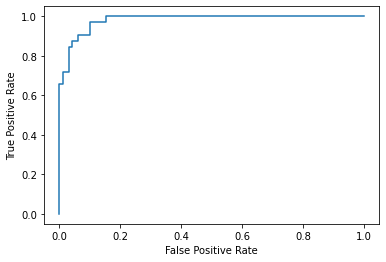

In [115]:
fpr_test, tpr_test, thresholds = roc_curve(y_test, y_hat_test)
RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

### 12) Evaluate! Based on the metrics of our train and test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- Slightly overfit to training data b/c AUC is larger in that graph and score is higher. But overall very high accuracy
- Overfit on several metrics, in particular recall. This means model has more false negatives than we want


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [68]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

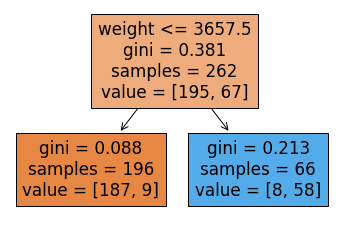

In [69]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

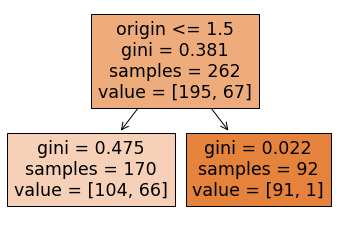

In [70]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Version 1 has the lowest total gini score of the children, so it has the lowest entropy = the most pure groups = the most ordered


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our train and test set

In [ ]:
# call_on_students(1)

In [72]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train) #actually you don't need to use the scaled data for decision trees. Doesn't matter either way

DecisionTreeClassifier(random_state=42)

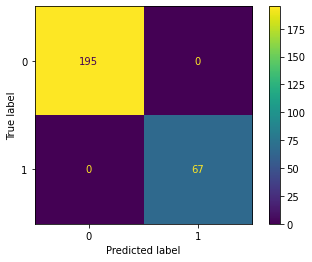

In [75]:
# Plot a confusion matrix on the train data
ConfusionMatrixDisplay(confusion_matrix(y_train, dt.predict(X_train_scaled))).plot()

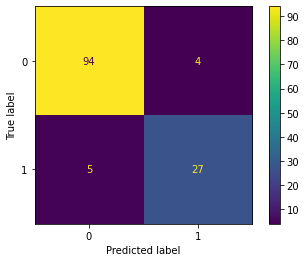

In [76]:
# Plot a confusion matrix on the test data
ConfusionMatrixDisplay(confusion_matrix(y_test, dt.predict(X_test_scaled))).plot()

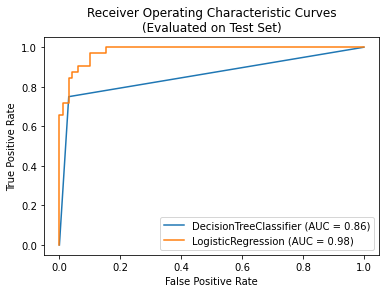

In [116]:
# Code to visualize the ROC curves for the models we've done
from sklearn.metrics import plot_roc_curve
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

TypeError: __init__() takes 1 positional argument but 3 positional arguments (and 2 keyword-only arguments) were given

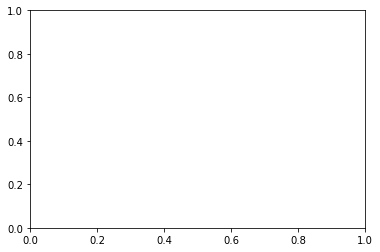

In [117]:
dt_pred_probs = dt.predict_proba(X_test_scaled)[:,1]
log_pred_probs = logreg.predict_proba(X_test_scaled)[:,1]

fpr1, tpr1, thresh1 = roc_curve(y_test, dt_pred_probs)
fpr2, tpr2, thresh2 = roc_curve(y_test, log_pred_probs)
fig, ax = plt.subplots()
RocCurveDisplay(fpr1, tpr1, roc_auc=roc_auc_score(y_test, dt_pred_probs), 
                estimator_name='dt').plot(ax=ax)
RocCurveDisplay(fpr2, tpr2, roc_auc=roc_auc_score(y_test, log_pred_probs),
                estimator_name='logreg').plot(ax=ax)

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Logreg is better model b/c it has a larger area under the curve (AUC)
